# Employee Attrition Rate using Regression

## Introduction

Artificial intelligence is commonly used in various trade circles to automate processes, gather insights on business, and speed up processes. You will use Python to study the usage of artificial intelligence in real-life scenarios - how AI actually impacts industries. 

Employees are the most important entities in an organization. Successful employees offer a lot to organisations. In this notebook, we will use AI to predict the attrition rate of employees or how often a company can retain employees.

## Context

We will be working with the dataset containing employee attrition rates, which is collected by Hackerearth and uploaded at [Kaggle](https://www.kaggle.com/blurredmachine/hackerearth-employee-attrition). We will use regression to predict attrition rates and see how successful is our model.



## Use Python to open csv files

We will use the [scikit-learn](https://scikit-learn.org/stable/) and [pandas](https://pandas.pydata.org/) to work with our dataset. Scikit-learn is a very useful machine learning library that provides efficient tools for predictive data analysis.  Pandas is a popular Python library for data science. It offers powerful and flexible data structures to make data manipulation and analysis easier.


## Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importing the Dataset

The dataset contains employee attrition rates. Let us visualize the dataset.



In [ ]:
train = pd.read_csv("Train_Attrition.csv") 
test = pd.read_csv("Test_Attrition.csv")

## Task 1: Print the columns of the training set

In [ ]:
train.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [ ]:
print(train.shape)
train.head()

(7000, 24)


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


### Data Description

Let us see how the data is distributed. We can visualize the mean, max, and min value of each column alongside other characteristics.

In [ ]:
train.describe()


,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


## Task2: Get information about the training data set using the describe function

In [ ]:
#Here is the description of the train data too
train.describe()


,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [ ]:
# Let's see if training set has any missing values
train.isna().any()

Employee_ID                  False
Gender                       False
Age                           True
Education_Level              False
Relationship_Status          False
Hometown                     False
Unit                         False
Decision_skill_possess       False
Time_of_service               True
Time_since_promotion         False
growth_rate                  False
Travel_Rate                  False
Post_Level                   False
Pay_Scale                     True
Compensation_and_Benefits    False
Work_Life_balance             True
VAR1                         False
VAR2                          True
VAR3                         False
VAR4                          True
VAR5                         False
VAR6                         False
VAR7                         False
Attrition_rate               False
dtype: bool

### Data Visualization

Now, let us see the correlation matrix to see how related are the features.

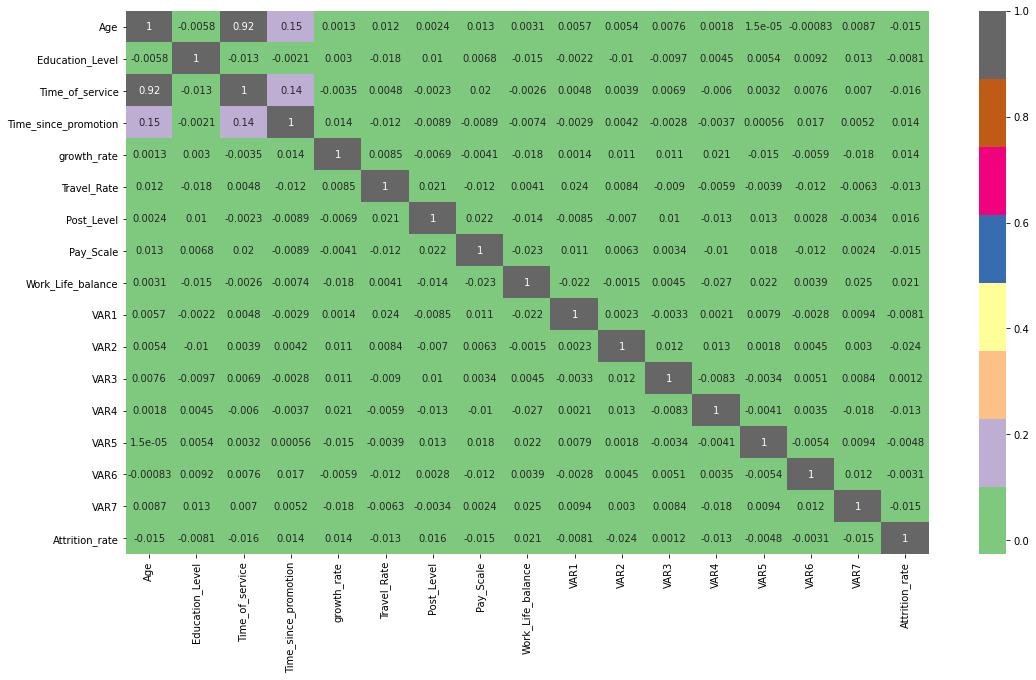

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(18,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
plt.show()
plt.savefig("main_correlation.png")

### Preparing the model

Now we will finalize the data for the training and prepare the model.

In [12]:
#Attrition_rate is the label or output to be predicted
#features will be used to predict Attrition_rate
label = ["Attrition_rate"]
features = ['VAR7','VAR6','VAR5','VAR1','VAR3','growth_rate','Time_of_service','Time_since_promotion','Travel_Rate','Post_Level','Education_Level']


In [14]:
featured_data = train.loc[:,features+label]
#We will drop the columns here which have missing values using dropna function
featured_data = featured_data.dropna(axis=0)
featured_data.shape

(6856, 12)

In [15]:
X = featured_data.loc[:,features]
y = featured_data.loc[:,label]

In [18]:
#Here the training and test data are split 55% to 45% as test size is 0.55
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.55)

In [22]:
#df = Ridge(alpha=0.000001)
df = LinearRegression()
df.fit(X_train,y_train)
y_pred = df.predict(X_test)
c=[]
for i in range(len(y_pred)):
    c.append((y_pred[i][0].round(5)))
pf=c[:3000]


In [23]:
#Let's print the accuracy now
score = 100* max(0, 1-mean_squared_error(y_test, y_pred))
print(score)

96.72970811621633


In [24]:
#Predicting
import pandas as pd
dff = pd.DataFrame({'Employee_ID':test['Employee_ID'],'Attrition_rate':pf})
dff.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.18662
1,EID_9658,0.20435
2,EID_22203,0.20973
3,EID_7652,0.20025
4,EID_6516,0.17774


## Task 3: Print the first 20 columns of predictions


In [25]:
dff.head(20)

,Employee_ID,Attrition_rate
0,EID_22713,0.18662
1,EID_9658,0.20435
2,EID_22203,0.20973
3,EID_7652,0.20025
4,EID_6516,0.17774
5,EID_20283,0.20274
6,EID_21014,0.18806
7,EID_7693,0.18530
8,EID_13232,0.18676
9,EID_6515,0.20339


### Conclusion

In this notebook, we have seen how AI can be used by companies to predict which employess would be loyal to them. We have bulit a linear regression model to predict the attrition rate.